In [71]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [73]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'Green'

In [30]:
data = pd.read_excel('inputs/Pune Real Estate Data.xlsx')
data.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...


In [31]:
# Extracting State and Country separately from the Location Column
data['City'] = data['Location'].apply(lambda x: x.split(',')[0].lower().strip())
data['State'] = data['Location'].apply(lambda x: x.split(',')[1].lower().strip())
data['Country'] = data['Location'].apply(lambda x: x.split(',')[2].lower().strip())
data.head(3)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,...,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india


In [32]:
data['Propert Type'].value_counts()

Propert Type
2bhk           56
3BHK           28
3bhk           19
2BHK           18
2 bhk          16
3 bhk          10
1BHK            9
1bhk            7
1 BHK           3
2bhk            3
2 bhk           2
3.5 bhk         2
3.5bhk          2
2.5 bhk         2
4 bhk           2
2.5 BHK         2
3 BHK           2
5BHK            2
2 BHK           1
3bhk            1
4.5bhk          1
1bhk            1
5 bhk           1
3+2bhk          1
2+2 bhk         1
3 BHK Grand     1
3 BHK           1
4BHK            1
6BHK            1
shop            1
1 bhk           1
3  bhk          1
4bhk            1
Name: count, dtype: int64

In [33]:
# Regex to match the numbers and create a separate column
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 
data['Property Type clean'] = data['Propert Type'].apply(lambda x: numbers.findall(x)[0] if len(numbers.findall(x)) > 0 else 0)

In [34]:
data['Sub-Area'].value_counts()

Sub-Area
Kharadi                     16
handewadi                   11
BT Kawade RD                10
Hinjewadi                    9
Ravet                        9
wadgaon sheri                9
hadapsar                     8
NIBM                         8
BANER                        7
pisoli                       6
kiwale                       6
vimannagar                   6
Akurdi                       6
Susgaon                      6
bavdhan budruk               6
bavdhan                      6
Karvanagar                   5
manjri                       5
Mahalunge                    5
Mundhwa                      5
dhanori                      4
Bavdhan                      4
mahalunge                    4
Balewadi                     4
tathawade                    4
KirkatWadi Sinhagad Road     3
baner                        3
Keshav Nagar                 3
ravet                        3
Undri                        2
mohammadwadi                 2
Koregaon Park                2

In [35]:
data['Sub-Area clean'] = data['Sub-Area'].apply(lambda x: x.lower().strip())

In [36]:
data['Company Name'].value_counts()

Company Name
Mantra Properties                29
kundan Spaces                    14
unique properties                11
Shapoorji Paloonji               10
jhala group                      10
Vijaya Laxmi Creations            9
Puraniks                          8
ravima ventures                   7
Lush Life                         6
vijaya Laxmi infrarealtors        6
VTP Reality                       6
Porwal & Anand Develkoper         6
nirman developers                 6
Oxy Buildcorp                     6
Kalpataru                         5
kohinoor group                    5
maha anand Pinnac associates      5
Urban Space Creator               5
SUPREME                           4
keystone landmark                 4
Wellwisher Apartments             3
Dolphin Group                     3
Bhaktamar Realities               3
proviso group                     3
venkatesh bhoomi construction     2
majestique landmarks              2
Calyx Spaces                      2
ANP CORP       

In [37]:
data['Company Name clean'] = data['Company Name'].apply(lambda x: x.lower().strip())

In [38]:
data['TownShip Name/ Society Name'].value_counts()

TownShip Name/ Society Name
Mantra 29 Gold           13
Eternia 2.0               8
brookefield willows       6
newton homes              6
Oxy Beaumonde             6
k ville                   6
Sensorium                 6
Abitante Fiore            6
Satyam Shery              6
Parklane UrbanJoy         6
Satyam Serenity           6
Impero                    6
Mantra Sky Tower          6
Presidia                  6
unique legacy royale      5
River Dale Residency      5
Urban Skyline             5
oxy eterno                4
mahalunge riviera         4
Vanaha                    4
SUPREME ESTIA             4
tranquility annexe        3
Mantra Insignia           3
Sportsville               3
Dolphin Garima            3
kiarah terrazo            3
VTP Blue Water            3
jade residences           3
7Hills                    3
Satyam Shivam             3
lesiure Town              3
simplicity                3
Bhaktamar Residency       3
puraniks Sayama           2
Kalpataru Serenity  

In [39]:
data['TownShip Name/ Society Name clean'] = data['TownShip Name/ Society Name'].apply(lambda x: x.lower().strip())

In [40]:
data['Description clean'] = data['Description'].apply(lambda x: x.lower().strip())

In [41]:
# Cleaning and encoding Binary Features
data['ClubHouse Clean'] = data['ClubHouse'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0})
data['School / University in Township Clean'] = data['School / University in Township '].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0})
data['Hospital in TownShip Clean'] = data['Hospital in TownShip'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0})
data['Mall in TownShip Clean'] = data['Mall in TownShip'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0})
data['Park / Jogging track Clean'] = data['Park / Jogging track'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0})
data['Swimming Pool Clean'] = data['Swimming Pool'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0})
data['Gym Clean'] = data['Gym'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0})

In [42]:
data.head(2)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,...,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,...,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,...,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1


In [43]:
#property area 2000 3200
def avg_property_area(x):
    x = numbers.findall(x)
    if len(x) == 1:
        return np.float32(x[0])
    elif len(x) == 2:
        return (np.float32(x[0])+np.float32(x[1]))/2
    else:
        return -99
    
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)")     
data['Property Area in Sq. Ft. clean'] = data['Property Area in Sq. Ft.'].apply(lambda x: avg_property_area(str(x)))

In [44]:
data[['Property Area in Sq. Ft. clean', 'Property Area in Sq. Ft.']].sample(5)

,Property Area in Sq. Ft. clean,Property Area in Sq. Ft.
143,725.0,725
123,697.0,697
176,378.0,378
76,670.0,670
139,1168.0,1168


In [85]:
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 
data['Price in lakhs clean'] = data['Price in lakhs'].apply(lambda x: np.float32(numbers.findall(str(x))[0]) if len(numbers.findall(str(x)))>0 else np.nan )
data[['Price in lakhs clean', 'Price in lakhs']].sample(5)

,Price in lakhs clean,Price in lakhs
3,89.000000,89
38,120.000000,120
39,42.000000,42
175,59.990002,59.99
40,57.000000,57


In [46]:
data.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,...,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs Clean
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,...,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,...,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,...,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,...,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,...,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


In [87]:
features = data.columns.tolist()[18:]
print("Total Number of Features: "+str(len(features)))
print("Total Features: ", features)

Total Number of Features: 18
Total Features:  ['City', 'State', 'Country', 'Property Type clean', 'Sub-Area clean', 'Company Name clean', 'TownShip Name/ Society Name clean', 'Description clean', 'ClubHouse Clean', 'School / University in Township Clean', 'Hospital in TownShip Clean', 'Mall in TownShip Clean', 'Park / Jogging track Clean', 'Swimming Pool Clean', 'Gym Clean', 'Property Area in Sq. Ft. clean', 'Price in lakhs Clean', 'Price in lakhs clean']


In [88]:
data_final = data[features]
data_final.sample(3)

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs Clean,Price in lakhs clean
50,pune,maharashtra,india,5,akurdi,mantra properties,mantra sky tower,"with shopping, entertainment, education, healt...",1,0,0,0,1,1,1,1579.0,163.000000,163.000000
190,pune,maharashtra,india,2,bavdhan,vijaya laxmi infrarealtors,satyam shery,vijaya laxmi infrarealtors is an aspirational ...,1,0,0,0,1,0,0,665.0,64.989998,64.989998
60,pune,maharashtra,india,3,hadapsar,ravima ventures,newton homes,the newton homes project boasts 6 elegant towe...,0,0,0,0,1,0,0,917.0,84.000000,84.000000


In [59]:
# Location
print(f"Unique Number of Cities in the Data: {data_final.City.nunique()}")

display(data_final.groupby('City')['Company Name clean'].count().reset_index())

Unique Number of Cities in the Data: 1


,City,Company Name clean
0,pune,200


Unique Number of Sub-Area in the Data: 34


,Sub-Area clean,City
13,kharadi,16
2,baner,12
27,ravet,12
8,handewadi,11
3,bavdhan,10
5,bt kawade rd,10
33,wadgaon sheri,9
9,hinjewadi,9
20,mahalunge,9
7,hadapsar,8


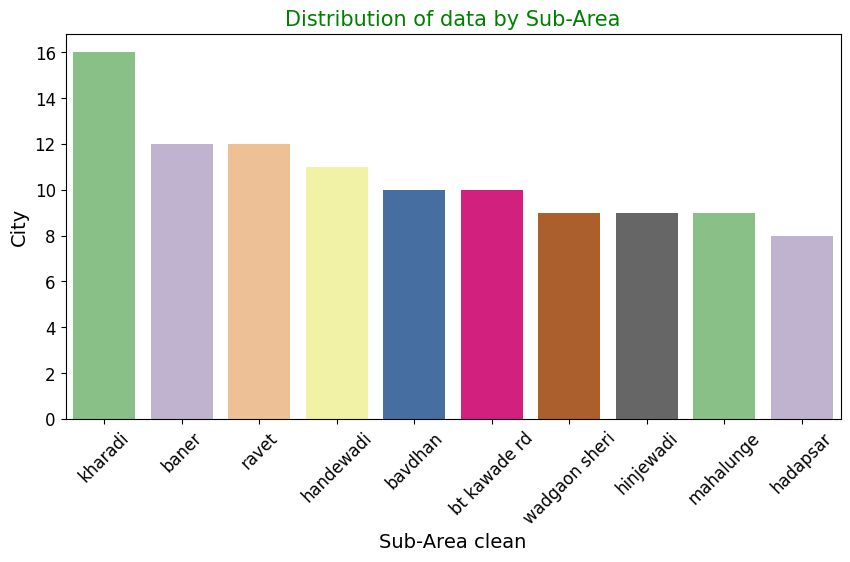

In [74]:
# Sub-Area
print(f"Unique Number of Sub-Area in the Data: {data_final['Sub-Area clean'].nunique()}")

temp = data_final.groupby('Sub-Area clean')['City'].count().reset_index().sort_values(by='City',ascending=False)[:10]
display(temp)

plt.figure(figsize=(10,5))
sns.barplot(x=temp['Sub-Area clean'],y=temp['City'], palette=("Accent"))
plt.title("Distribution of data by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

In [109]:
# Treating outliers in the numeric columns
cols_to_treat = ['Property Area in Sq. Ft. clean','Price in lakhs clean']

print("\nDistribution (raw):")
display(data_final[cols_to_treat].describe())        

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    data_final = clip_outliers(data_final,col)
    

print("\nDistribution (after outlier treatment):")
display(data_final[cols_to_treat].describe())  


Distribution (raw):


,Property Area in Sq. Ft. clean,Price in lakhs clean
count,200.000000,199.000000
mean,894.060000,95.258292
std,380.256831,101.869843
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435001
max,2447.000000,930.000000



Distribution (after outlier treatment):


,Property Area in Sq. Ft. clean,Price in lakhs clean
count,200.000000,199.000000
mean,878.655000,84.213065
std,334.181777,44.552319
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435001
max,1671.800000,190.300000


,Sub-Area clean,Price in lakhs clean
11,kayani nagar,190.300000
18,lonavala,174.650000
24,nibm,145.575000
17,koregoan,139.500000
10,karvanagar,135.800000
2,baner,132.965000
32,vimannagar,127.500000
0,akurdi,109.666667
16,koregaon park,108.500000
5,bt kawade rd,106.049000


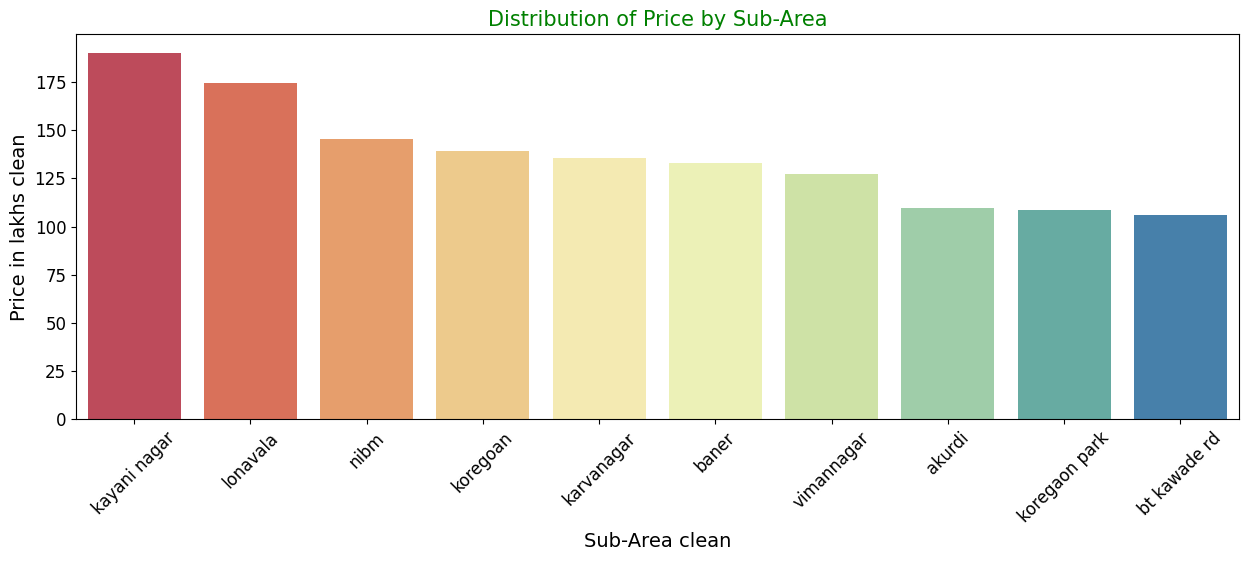

In [113]:
temp = (data_final.groupby('Sub-Area clean')['Price in lakhs clean'].mean()
            .reset_index().sort_values(by='Price in lakhs clean',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Sub-Area clean'],y=temp['Price in lakhs clean'], palette=("Spectral"))
plt.title("Distribution of Price by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

Unique Number of Company in the Data: 37


,Company Name clean,City
0,mantra properties,29
1,kundan spaces,14
2,unique properties,11
3,shapoorji paloonji,10
4,jhala group,10
5,vijaya laxmi creations,9
6,puraniks,8
7,ravima ventures,7
8,lush life,6
9,vijaya laxmi infrarealtors,6


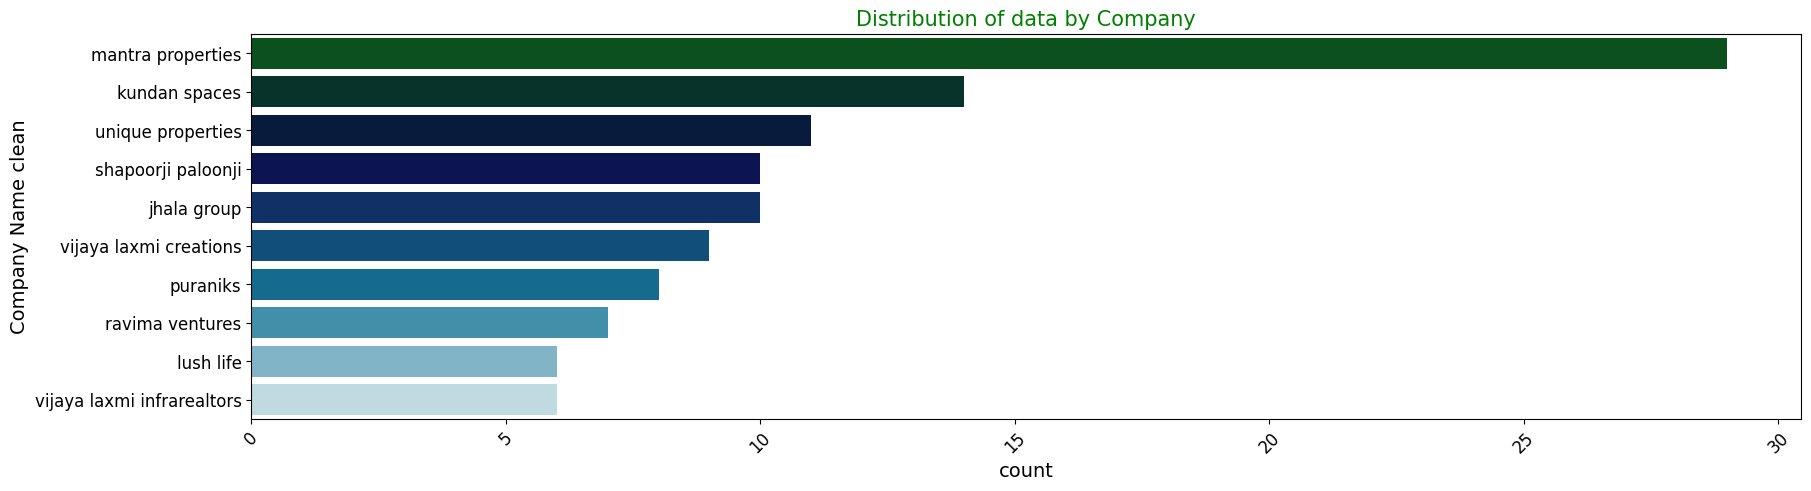

In [76]:
# Company
print(f"Unique Number of Company in the Data: {data_final['Company Name clean'].nunique()}")

display(data_final.groupby('Company Name clean')['City'].count().sort_values(ascending=False).reset_index()[:10])

plt.figure(figsize=(20,5))
sns.countplot(data_final['Company Name clean'],
              order=data_final.groupby('Company Name clean')['City'].count().sort_values(ascending=False).index[:10], palette=("ocean"))
plt.title("Distribution of data by Company",size=15)
plt.xticks(rotation=45)
plt.show()

Unique Number of Township/Society in the Data: 54


,TownShip Name/ Society Name clean,City
0,mantra 29 gold,13
1,eternia 2.0,8
2,newton homes,6
3,oxy beaumonde,6
4,parklane urbanjoy,6
5,presidia,6
6,satyam serenity,6
7,k ville,6
8,satyam shery,6
9,abitante fiore,6


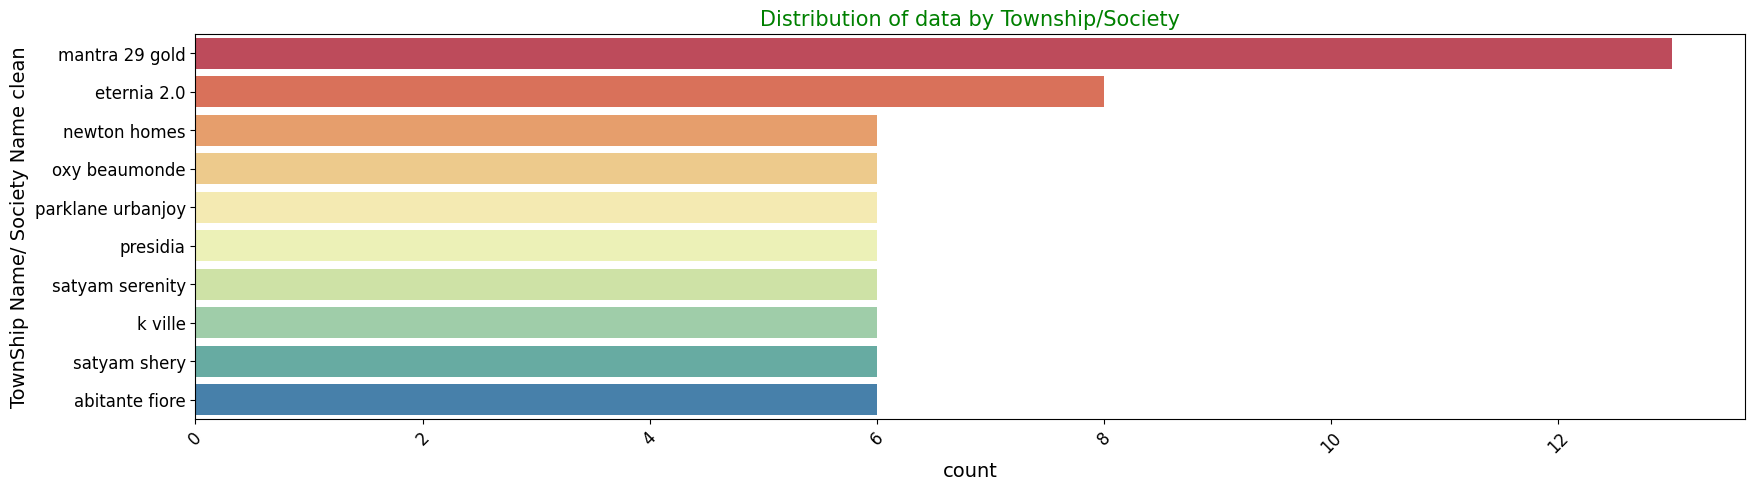

In [80]:
# Township
print(f"Unique Number of Township/Society in the Data: {data_final['TownShip Name/ Society Name clean'].nunique()}")

display(data_final.groupby('TownShip Name/ Society Name clean')['City'].count().sort_values(ascending=False)
          .reset_index()[:10])

plt.figure(figsize=(20,5))
sns.countplot(data_final['TownShip Name/ Society Name clean'],
              order=data_final.groupby('TownShip Name/ Society Name clean')['City'].count()
                      .sort_values(ascending=False).index[:10], palette=("Spectral"))
plt.title("Distribution of data by Township/Society",size=15)
plt.xticks(rotation=45)
plt.show()

Summary Statistics of Property Area:


,Property Area in Sq. Ft. clean
count,200.000000
mean,894.060000
std,380.256831
min,113.000000
25%,670.000000
50%,800.500000
75%,1041.250000
max,2447.000000


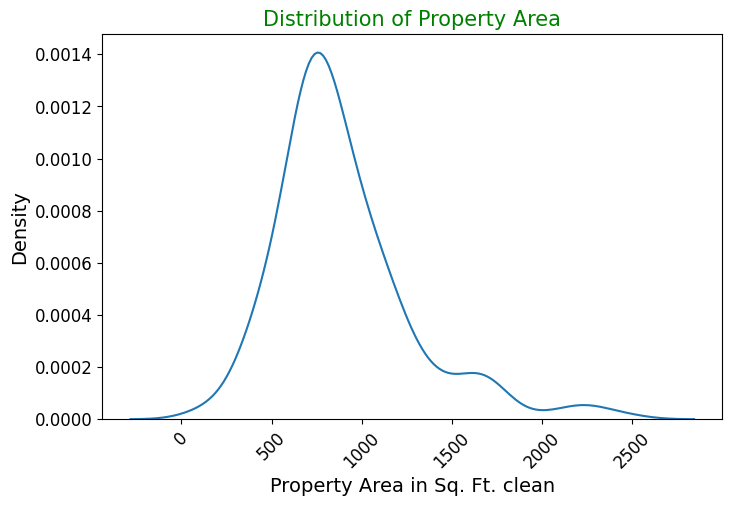

In [82]:
print("Summary Statistics of Property Area:")
display(data_final[['Property Area in Sq. Ft. clean']].describe())

plt.figure(figsize=(8,5))
sns.kdeplot(data_final['Property Area in Sq. Ft. clean'])
plt.title("Distribution of Property Area",size=15)
plt.xticks(rotation=45)
plt.show()

Summary Statistics of Price:


,Price in lakhs clean
count,199.000000
mean,95.258292
std,101.869843
min,13.190000
25%,51.500000
50%,70.000000
75%,99.435001
max,930.000000


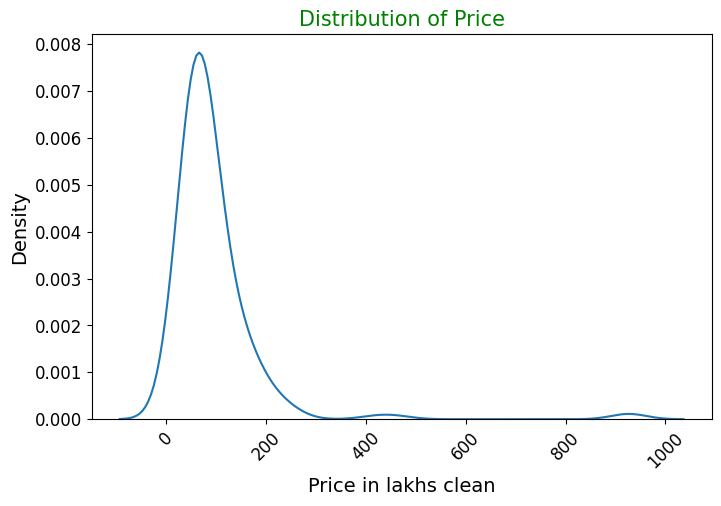

In [89]:
print("Summary Statistics of Price:")
display(data_final[['Price in lakhs clean']].describe())

plt.figure(figsize=(8,5))
sns.kdeplot(data_final['Price in lakhs clean'])
plt.title("Distribution of Price",size=15)
plt.xticks(rotation=45)
plt.show()

,Property Area in Sq. Ft. clean,Price in lakhs clean
count,200.000000,199.000000
mean,894.060000,95.258292
std,380.256831,101.869843
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435001
max,2447.000000,930.000000


Property Area in Sq. Ft. clean    0.493096
Price in lakhs clean              1.000000
Name: Price in lakhs clean, dtype: float64


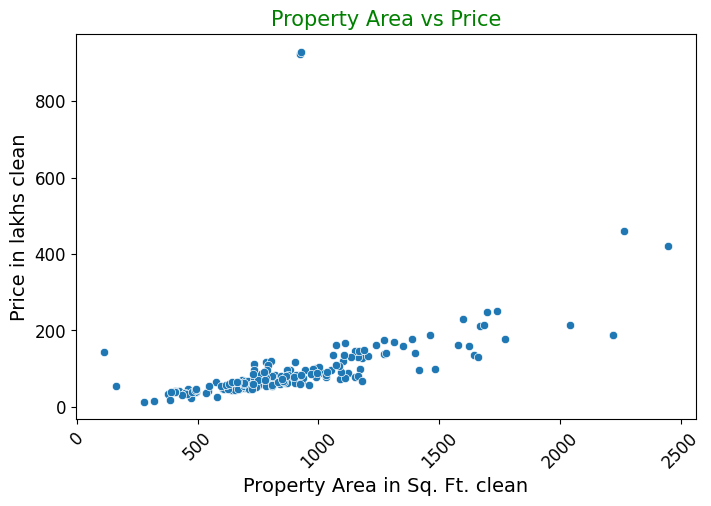

In [95]:
# Property Area vs Price
temp = data_final[['Property Area in Sq. Ft. clean','Price in lakhs clean']]

display(temp.describe())

corr_matrix = temp.corr()
print(corr_matrix['Price in lakhs clean'])

plt.figure(figsize=(8,5))
sns.scatterplot(x='Property Area in Sq. Ft. clean',y='Price in lakhs clean', data=temp)
plt.title("Property Area vs Price",size=15)
plt.xticks(rotation=45)
plt.show()

In [102]:
data_final.head()

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs Clean,Price in lakhs clean
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,74.0
3,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0,89.0
4,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0,74.0


7


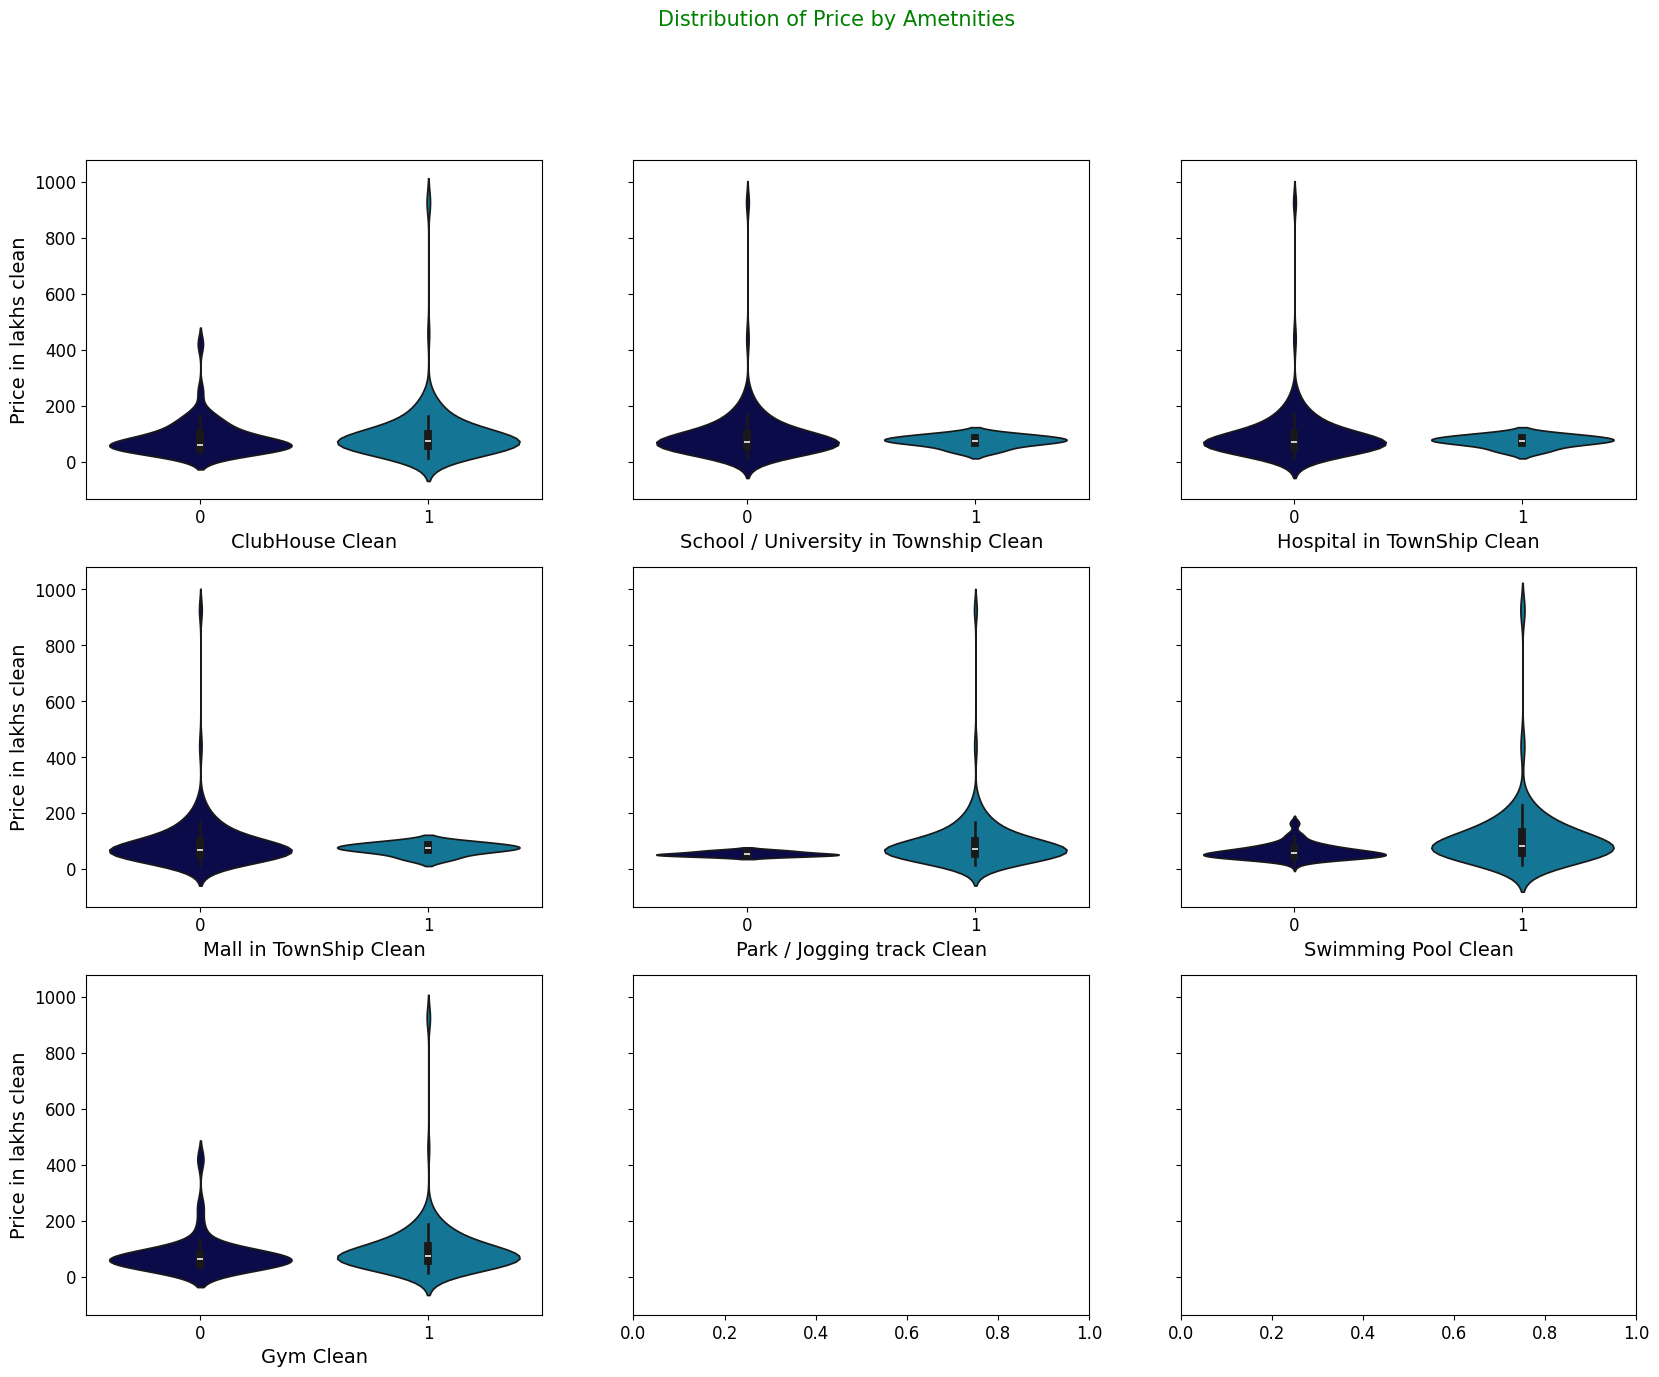

In [105]:
feats_to_plot = data_final.columns.tolist()[8:15]
print(len(feats_to_plot))
fig,ax = plt.subplots(nrows=3,ncols=3,sharey=True,figsize=(20,15))
plt.suptitle("Distribution of Price by Ametnities",size=15)
for i,col in enumerate(feats_to_plot):
    sns.violinplot(x = data_final[col],y=data_final['Price in lakhs clean'],ax=ax[i//3,i%3], palette=("ocean"))

,Amenities,Popularity
4,Park / Jogging track Clean,81
6,Gym Clean,71
5,Swimming Pool Clean,66
0,ClubHouse Clean,62
1,School / University in Township Clean,2
2,Hospital in TownShip Clean,2
3,Mall in TownShip Clean,2


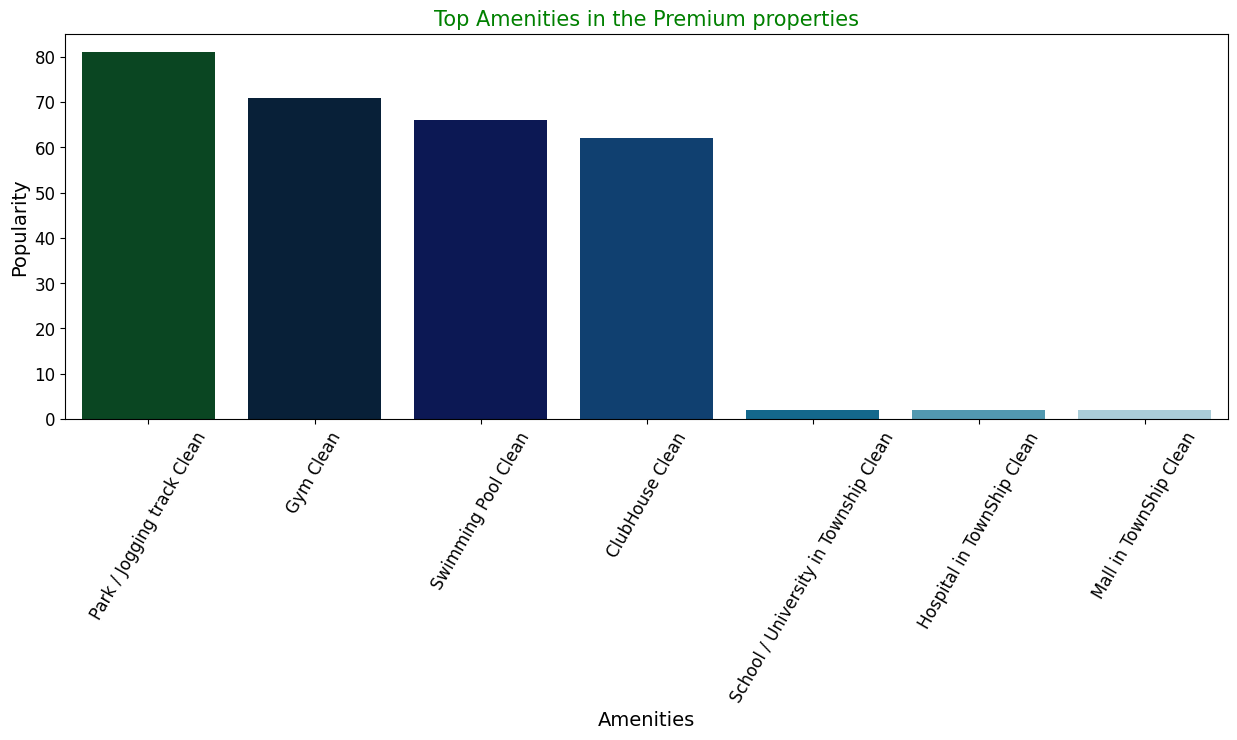

In [107]:
# selecting threshold as 80 Lakhs
amenities_cols = data_final.columns.tolist()[8:15]

temp = data_final[data_final['Price in lakhs clean']>=80][amenities_cols].sum().reset_index()
temp.rename(columns={'index':'Amenities',0:'Popularity'},inplace=True)
temp = temp.sort_values(by='Popularity',ascending=False)
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities'],y=temp['Popularity'], palette=("ocean"))
plt.title("Top Amenities in the Premium properties",size=15)
plt.xticks(rotation=60)
plt.show()

ValueError: could not convert string to float: 'bavdhan'

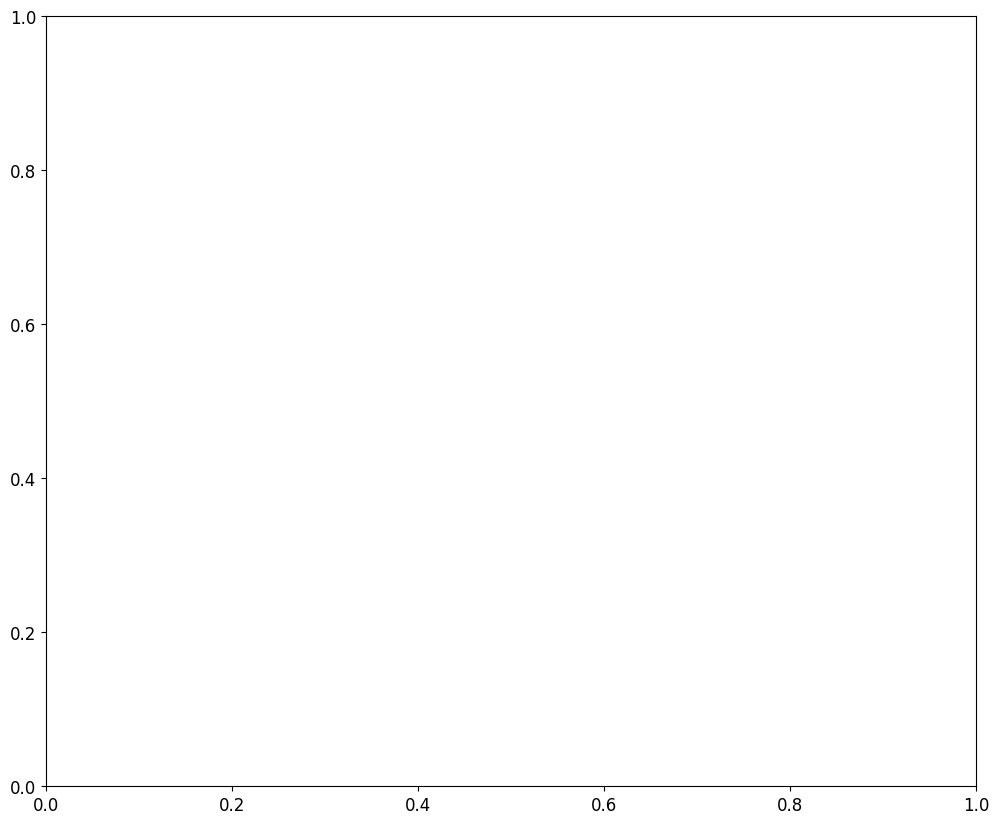

In [100]:
data = data_final.drop(['City', 'State', 'Country'], axis=1)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(method='pearson')))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True, mask=mask)
ax.set_title('Correlation Matrix', fontsize=16)

In [114]:
plt.figure(figsize=(10,5))
sns.heatmap(data_final.corr(),annot=True)

ValueError: could not convert string to float: 'pune'

<Figure size 1000x500 with 0 Axes>